<a href="https://colab.research.google.com/github/Fathaa/COVID19-EDA/blob/main/COVID_19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comprehensive COVID-19 Data Analysis: Understanding the Pandemic Through Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
covid_data = pd.read_csv(url)

# Convert the date column to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Display the first few rows of the dataset
print(covid_data.head())


        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


In [ ]:
# Displaying summary information about the dataset
print(covid_data.info())

# summary statistics
print(covid_data.describe())

# Total number of cases, deaths, and recoveries globally
total_cases = covid_data['Confirmed'].sum()
total_deaths = covid_data['Deaths'].sum()
total_recoveries = covid_data['Recovered'].sum()
print(f'Total Confirmed Cases: {total_cases}')
print(f'Total Deaths: {total_deaths}')
print(f'Total Recoveries: {total_recoveries}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None
                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max 

# **EXPLORATORY DATA ANALYSIS**



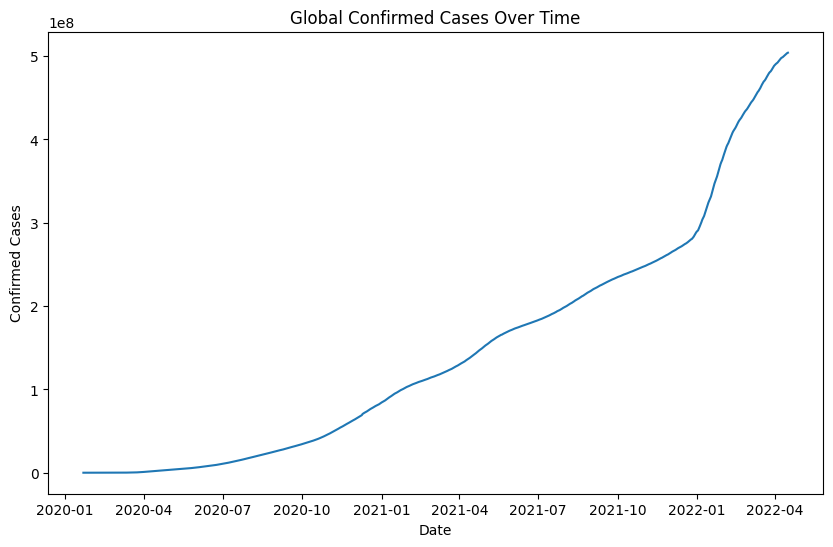

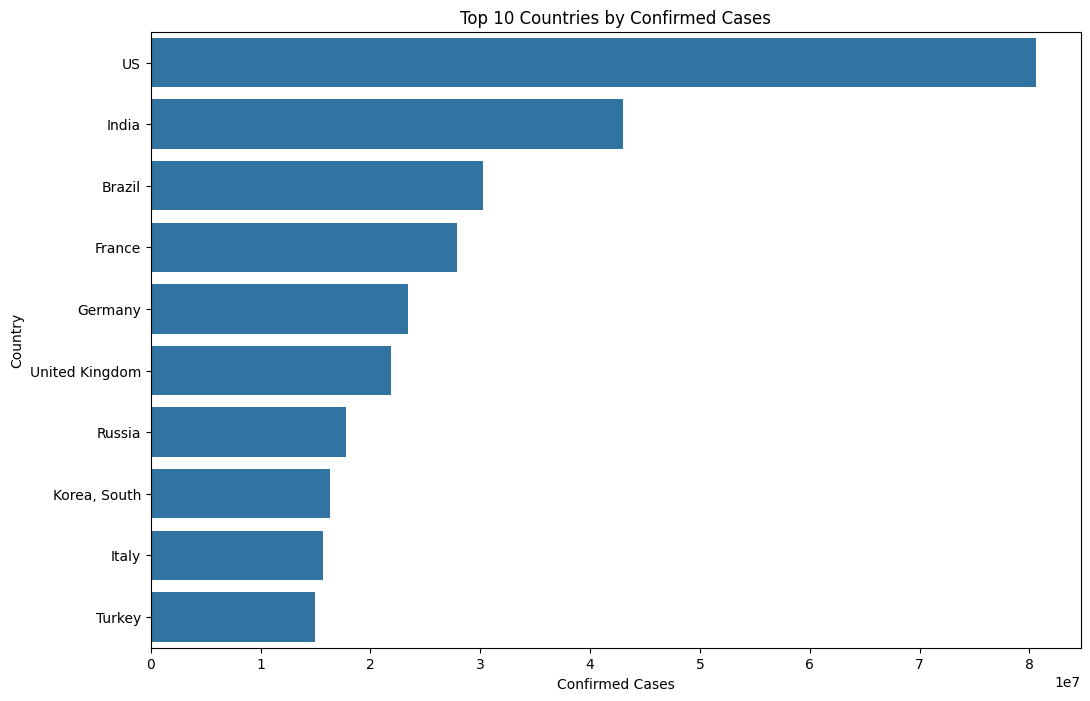

In [ ]:
# Global trends over time
global_trends = covid_data.groupby('Date').sum().reset_index()

# Plot global confirmed cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_trends)
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Top 10 countries with the highest number of confirmed cases
top_countries = covid_data.groupby('Country').max().sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries['Confirmed'], y=top_countries.index)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()



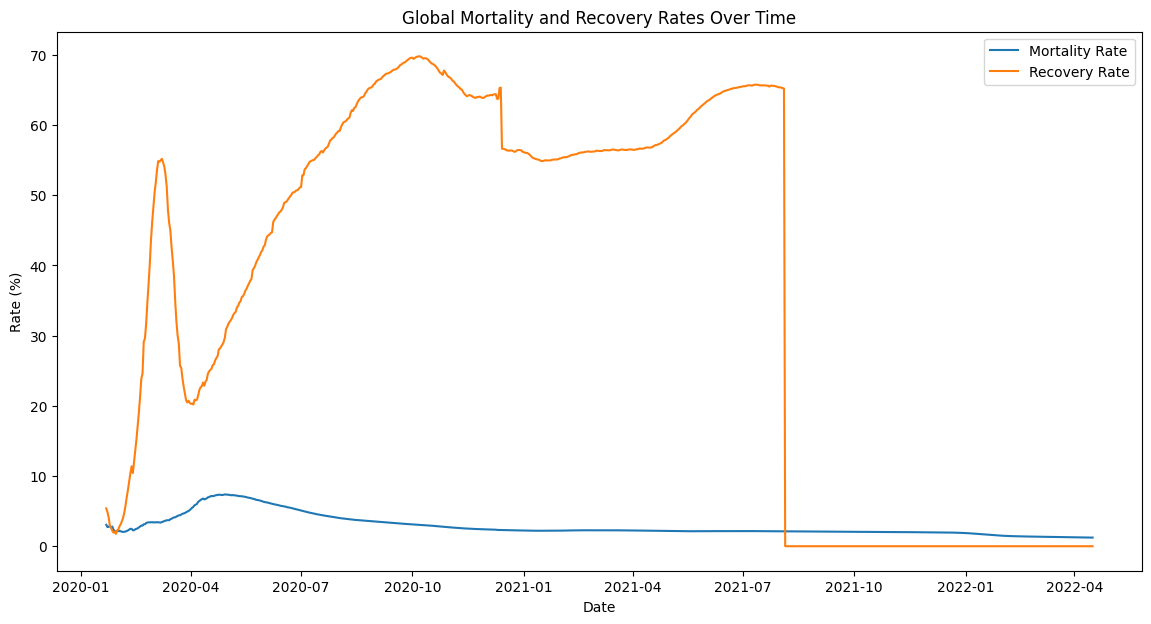

In [ ]:
# Calculting global mortality and recovery rates
global_trends['Mortality_Rate'] = (global_trends['Deaths'] / global_trends['Confirmed']) * 100
global_trends['Recovery_Rate'] = (global_trends['Recovered'] / global_trends['Confirmed']) * 100

# Ploting mortality and recovery rates globally over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Mortality_Rate', data=global_trends, label='Mortality Rate')
sns.lineplot(x='Date', y='Recovery_Rate', data=global_trends, label='Recovery Rate')
plt.title('Global Mortality and Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.show()




           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.956593  -0.070744
Deaths      0.956593  1.000000   0.055685
Recovered  -0.070744  0.055685   1.000000


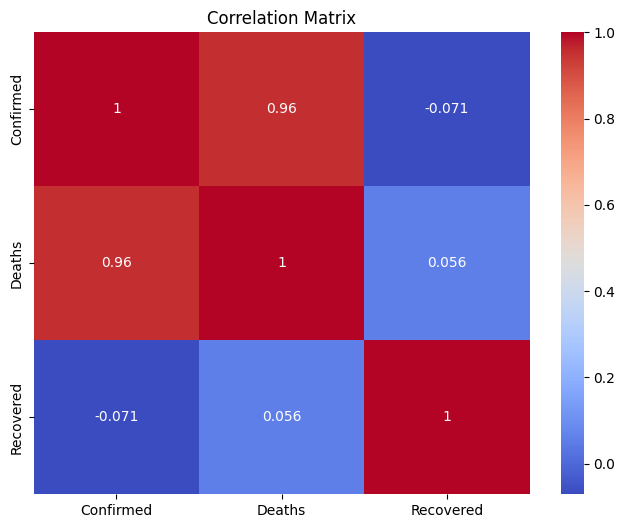

In [ ]:
# Calculate correlations
correlation_matrix = global_trends[['Confirmed', 'Deaths', 'Recovered']].corr()
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



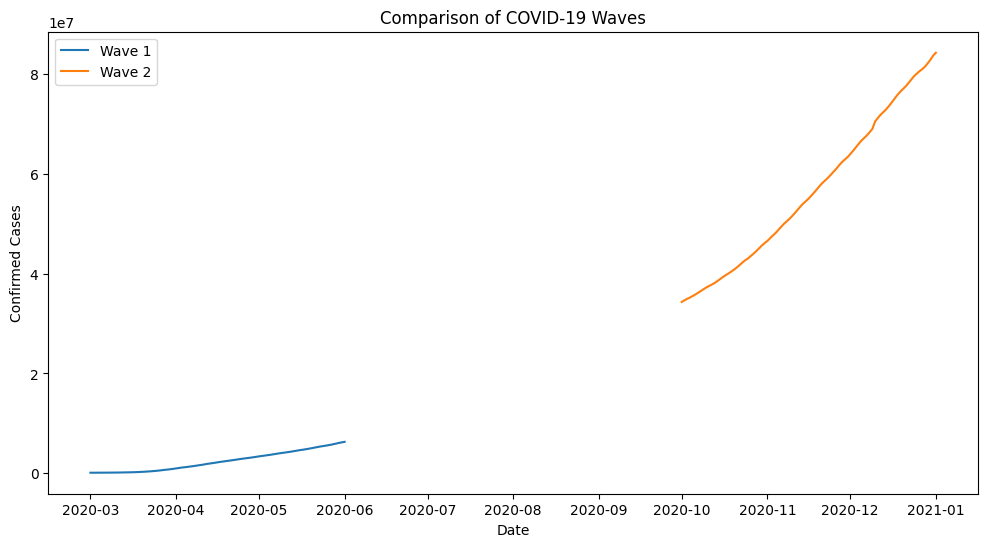

In [ ]:
# Define date ranges for different waves
wave1_start = '2020-03-01'
wave1_end = '2020-06-01'
wave2_start = '2020-10-01'
wave2_end = '2021-01-01'

# Define date ranges for different waves
wave1_start = '2020-03-01'
wave1_end = '2020-06-01'
wave2_start = '2020-10-01'
wave2_end = '2021-01-01'

# Define date ranges for different waves
wave1_start = '2020-03-01'
wave1_end = '2020-06-01'
wave2_start = '2020-10-01'
wave2_end = '2021-01-01'

# Filter the data for each wave
wave1 = covid_data[(covid_data['Date'] >= wave1_start) & (covid_data['Date'] <= wave1_end)]
wave2 = covid_data[(covid_data['Date'] >= wave2_start) & (covid_data['Date'] <= wave2_end)]

# Resample to daily frequency and fill missing dates
wave1 = wave1.set_index('Date').resample('D').sum().fillna(0).reset_index()
wave2 = wave2.set_index('Date').resample('D').sum().fillna(0).reset_index()

# Aggregated data for each wave
wave1_trends = wave1.groupby('Date').sum().reset_index()
wave2_trends = wave2.groupby('Date').sum().reset_index()

# Plot wave 1 and wave 2 trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=wave1_trends, label='Wave 1')
sns.lineplot(x='Date', y='Confirmed', data=wave2_trends, label='Wave 2')
plt.title('Comparison of COVID-19 Waves')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()




In [ ]:
# Peak dates for confirmed cases, deaths, and recoveries globally
peak_confirmed = global_trends.loc[global_trends['Confirmed'].idxmax()]
peak_deaths = global_trends.loc[global_trends['Deaths'].idxmax()]
peak_recoveries = global_trends.loc[global_trends['Recovered'].idxmax()]

print(f'Peak Confirmed Cases: {peak_confirmed["Date"].date()} with {peak_confirmed["Confirmed"]} cases')
print(f'Peak Deaths: {peak_deaths["Date"].date()} with {peak_deaths["Deaths"]} deaths')
print(f'Peak Recoveries: {peak_recoveries["Date"].date()} with {peak_recoveries["Recovered"]} recoveries')


Peak Confirmed Cases: 2022-04-16 with 504155459 cases
Peak Deaths: 2022-04-16 with 6197159 deaths
Peak Recoveries: 2021-08-04 with 130899061 recoveries


In [ ]:
# Define a threshold for a spike (e.g., 1000 confirmed cases)
spike_threshold = 1000

# Identify the earliest date each country reached the spike threshold
earliest_spikes = covid_data[covid_data['Confirmed'] >= spike_threshold].groupby('Country')['Date'].min().reset_index()
earliest_spikes = earliest_spikes.sort_values(by='Date')

print(earliest_spikes.head(10))  # Display the first 10 countries to reach the spike threshold


            Country       Date
36            China 2020-01-25
90     Korea, South 2020-02-26
83            Italy 2020-02-29
79             Iran 2020-03-02
61           France 2020-03-08
65          Germany 2020-03-09
159           Spain 2020-03-09
176              US 2020-03-11
180  United Kingdom 2020-03-11
164     Switzerland 2020-03-13


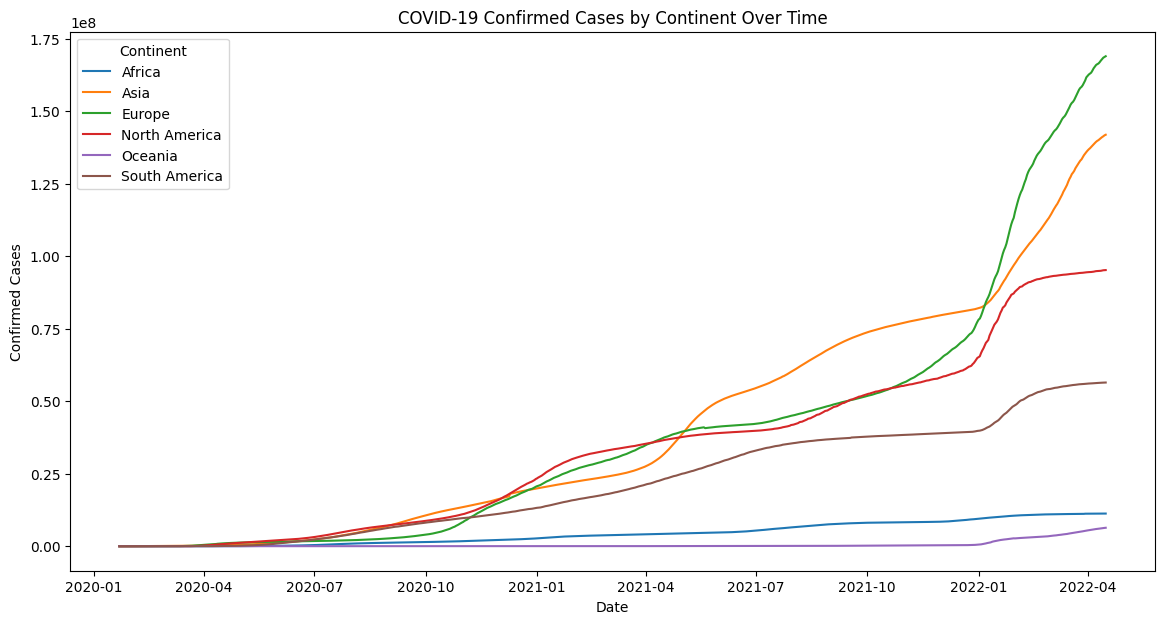

In [ ]:
# Load additional dataset containing country to continent mapping
continent_url = 'https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv'
continent_data = pd.read_csv(continent_url)

# Merge continent data with covid_data
covid_data = covid_data.merge(continent_data, how='left', left_on='Country', right_on='Country')

# Group by continent and date
continent_trends = covid_data.groupby(['Continent', 'Date']).sum().reset_index()

# Plot trends by continent
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', hue='Continent', data=continent_trends)
plt.title('COVID-19 Confirmed Cases by Continent Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Continent')
plt.show()



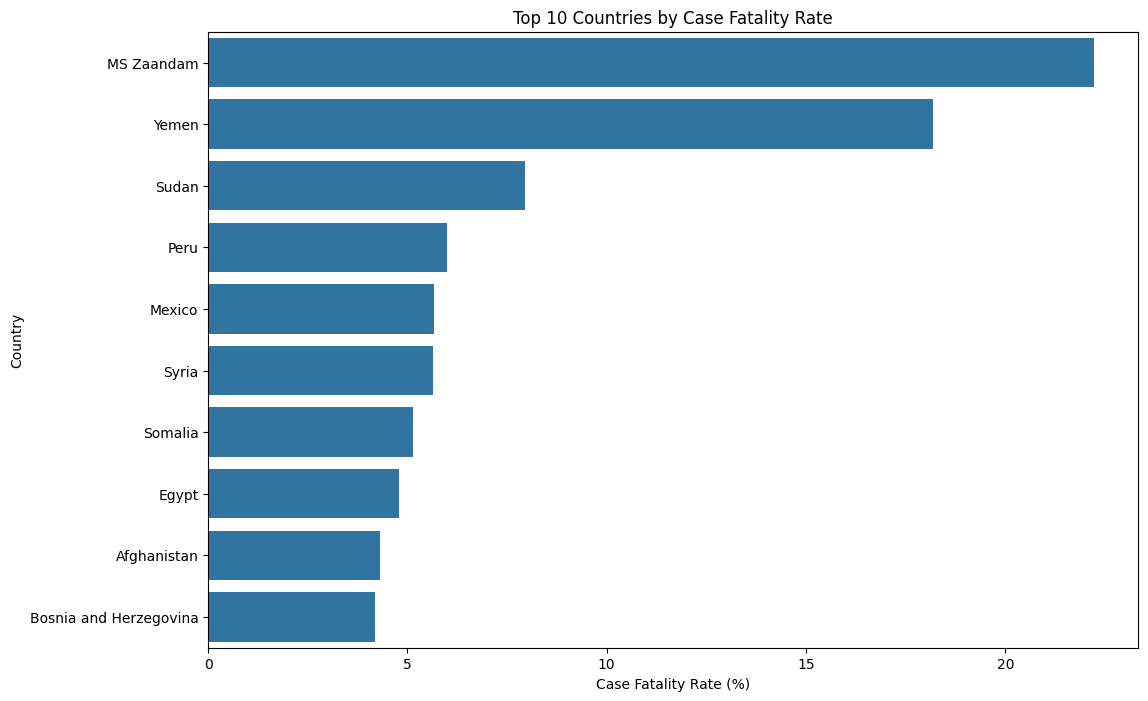

In [ ]:
# Calculate Case Fatality Rate (CFR) by country
country_cfr = covid_data.groupby('Country').max().reset_index()
country_cfr['CFR'] = (country_cfr['Deaths'] / country_cfr['Confirmed']) * 100

# Plot CFR for top 10 countries with highest CFR
top_cfr_countries = country_cfr.sort_values(by='CFR', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='CFR', y='Country', data=top_cfr_countries)
plt.title('Top 10 Countries by Case Fatality Rate')
plt.xlabel('Case Fatality Rate (%)')
plt.ylabel('Country')
plt.show()